# CSCI E-82  Homework 1.b
Due by 9/14/17 at 11:59pm EST to the Canvas dropbox

## Be sure that the code can run from start to finish without errors.
## Save the notebook as HW1_yourLastName_yourFirstName


### Under each problem, we have a place for you to write the answer, or write runnable code that will produce the answer.  Show your work.
-----------

## Introduction

The goals of this homework are:
- to review some basic probability that you will need for the course
- to ensure you know Bayes rule
- to practice multiple linear regression and its diagnostics
- to gain further experience with python by coding a simulation
- to run a gradient descent for a function


In [165]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand
import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Image

## Problem 0  what is your name (1 point)

In [4]:
print("Karma Tarap")

Karma Tarap


## Problem 1 using the roulette wheel (8 pts)


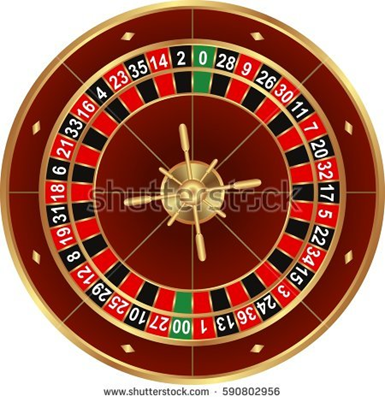

In [5]:
Image("roulette.png")



#### Problem 1a	
What is the probability of a red value?



In [6]:
print ("{:.3f}".format(18/38))

0.474


#### Problem 1b
What is the probability of getting a red number > 25

In [7]:
print ("{:.3f}".format(5/38))

0.132


#### Problem 1c
what is the probability of getting a number > 25 given that the value is known to be red?

In [8]:
print ("P(>25|red) = P(>25 and red)/P(red)")
print ("{:.3f}".format(.132/.474))

P(>25|red) = P(>25 and red)/P(red)
0.278


## Problem 2  Bayes Law (16 points)

Eyewitnesses collectively reported that that the robbery suspects matched the following description:
- Interracial couple
- African-American male with a beard and mustache
- Blond woman with a ponytail
- Yellow getaway car

In the ensuing court case, a statistician identified the probability of each of these attributes as:

| Feature                       | Chance of occurrence |
|-------------------------------|----------------------|
| Mustache                      | 25%                  |
| African American with a beard	| 10%                  |
| Woman with ponytail           | 10%                  | 
| Blond woman                   | 30%                  |
| Interracial couples           | 1%                   | 
| Yellow car                    | 10%                  |

The statistician computed P(evidence | ~ guilty)


#### Problem 2a  

State the property of conditional independence (that may be helpful for this problem)

In [ ]:
#Symmetry

#### Problem 2b  
Compute P(evidence | ~guilty) using the assumption of conditional independence.


In [173]:
#P(Moustache ∩ AABeard ∩ WWPTail ∩ BWoman ∩ IRCouple ∩ YCar|~guilty)
#= P(Moustache|~guilty)*P(AABeard|~guilty)*P(WWPTail|~guilty)*P(BWoman|~guilty)*P(IRCouple|~guilty)*P(Car|~guilty)
#Since P(evidence|~guilty) is approx equivelent to P(evidence) in the general population
print ("P(evidence|~guilty) = {}".format(.25*.1*.1*.3*.01*.1))

P(evidence|~guilty) = 7.500000000000001e-07


#### Problem 2c

Write out Bayes' Law for P(guilty | evidence)  (i.e. do not compute it yet.  It does not have to be pretty, although we wouldn't mind)

In [175]:
print("P(guilty|evidence) = P(evidence|guilty)*P(guilty)/P(evidence)")

P(guilty|evidence) = P(evidence|guilty)*P(guilty)/P(evidence)


#### Problem 2d
Using Bayes' Law, compute P(guitly | evidence) as a function of P(guilty) assuming that P(evidence | guilty) = 1.0 as a worst case.
This means that the answer will not have a numeric value, but will have an equation that includes the P(guilty) term.

In [176]:
print("P(guilty|evidence) = P(guilty)/7.500000000000001e-07")


P(guilty|evidence) = P(guilty)/7.500000000000001e-07


## Problem 3 [20 points]. Climate Change

Scientists and politicians are often at odds on the topic of whether global warming is real and debate the various causes. This problem uses "globalWarm2.txt" data.

#### Problem 3a 
Fit an equation to the temperature as a function of year. 
Based on your results, is the temperature increasing as a function of year based on the last three plus decades?

In [11]:
climateData = pd.read_csv('globalWarm2.txt',sep="\t")
climateData.head(n=10)



,Year,Temp,CO2,Solar,Transmission,IceShelf
0,1979,8,336.67,1366.43,0.928467,7.20
1,1980,19,338.57,1366.51,0.929667,7.85
2,1981,26,339.92,1366.51,0.929767,7.25
3,1982,4,341.30,1366.16,0.853067,7.45
4,1983,25,342.71,1366.18,0.897717,7.52
5,1984,9,344.24,1365.71,0.916492,7.17
6,1985,4,345.81,1365.57,0.924425,6.93
7,1986,12,347.11,1365.59,0.926792,7.54
8,1987,27,348.72,1365.67,0.929092,7.48
9,1988,31,351.04,1365.97,0.930125,7.49


Regression formula: y = 1.672471x + -3302.149010
There has been a clear increase in the average temperature over the last thrr


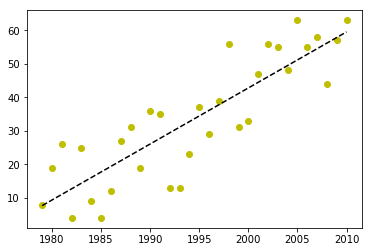

In [97]:
x, y = climateData['Year'],climateData['Temp']

lm = np.polyfit(x, y, 1)
lm_fn = np.poly1d(lm) 


plt.plot(x, y, 'yo', x, lm_fn(x), '--k')
print ("Regression formula: y = {:3f}x + {:3f}".format(*lm))


In [13]:
print("There has been a clear increase in the average temperature over the last three decades")

There has been a clear increase in the average temperature over the last three decades


#### Problem 3b 
Plot a scatter plot of the following variables (preferably in a lattice): Temp, CO2, Solar, Transmission, and IceShelf. 
    
The variables represent the following:
- Temp = annual surface temperature measured in $1/100^{\circ} C$ over the 1950-1980 mean.
- Solar = annual mean intensity of sunlight piercing the atmosphere 
- CO2 = annual average fraction CO2 in atmosphere (#molecules/#molecules of dry air) 
- IceShelf = sea ice in 1MM square miles hypothesized to reflect heat 
- Transmission = volcanic MLO transmission data where eruptions release greenhouse gases but also decrease the temperature 




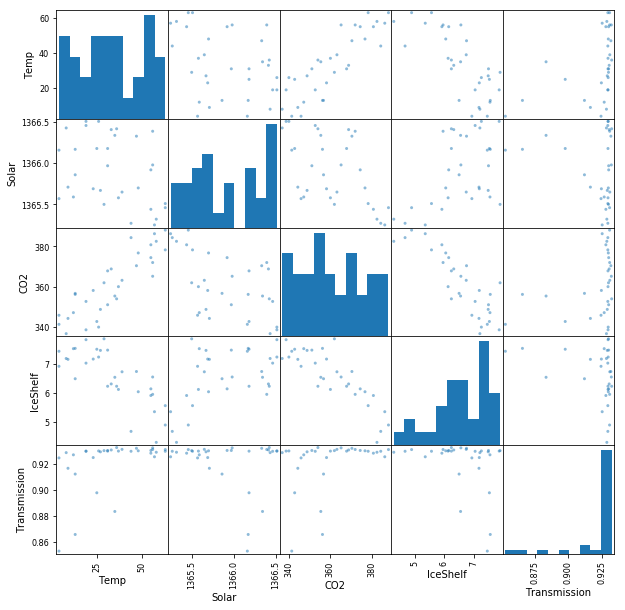

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(climateData[['Temp','Solar','CO2','IceShelf','Transmission']],figsize=(10,10));

#### Problem 3c 
Compute a multiple linear regression model of log(Temp) against the other variables. Note that since there are limited number of annual measurements, you cannot run all combinations of variables. In fact, you can only do complete pairwise interactions. Be sure to remove the non-significant variables while still maintaining the hierarchy principle in your final model. Interpret the results.

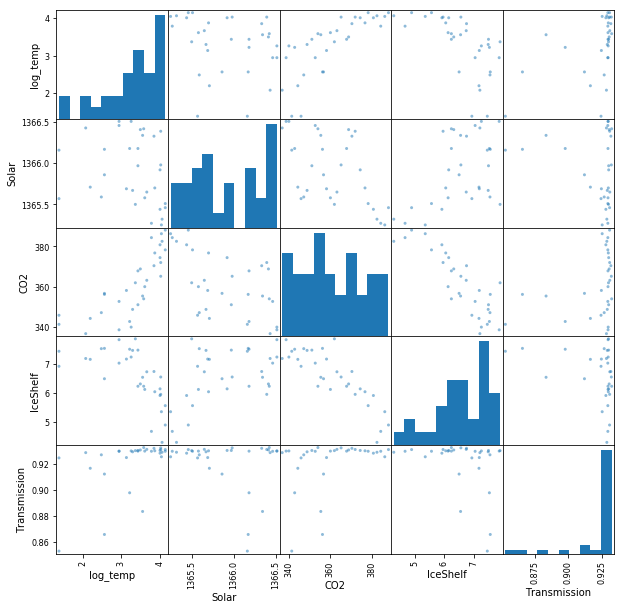

In [130]:
#Log transform Temp
climateData["log_temp"] = np.log(climateData["Temp"])

#visualise relationship with log transformed temp
scatter_matrix(climateData[['log_temp','Solar','CO2','IceShelf','Transmission']],figsize=(10,10));


In [205]:
#Checking for multicollinearity from the eigenvalues of the correlation matrix

corr = np.corrcoef(climateData[['Solar','CO2','IceShelf','Transmission']], rowvar=0)
e_val, e_vec = np.linalg.eig(corr) 
e_val

#No values are sufficiently close to 0, so no collinearity in our variables

array([ 2.42456536,  0.83828891,  0.58921182,  0.14793391])

In [206]:


#start with all pairwise combinations
mod = smf.ols(formula='log_temp ~ Solar * CO2 + Solar * IceShelf + Solar * Transmission + CO2 * IceShelf + CO2 * Transmission + IceShelf * Transmission', 
              data=climateData).fit()
mod.summary()


SyntaxError: invalid syntax (<unknown>, line 1)

In [201]:
mod = smf.ols(formula='log_temp ~  CO2  + Solar * Transmission ', data=climateData).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_temp   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     26.12
Date:                Fri, 15 Sep 2017   Prob (F-statistic):           6.13e-09
Time:                        00:44:45   Log-Likelihood:                -10.857
No. Observations:                  32   AIC:                             31.71
Df Residuals:                      27   BIC:                             39.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.352e+05   4.17e+04     -3.245      0.003   -2.21e+05   -4.97e+04
CO2                    0.0355      0.006      6.296      0.000       0.024       0.047
Solar                 98.9595     30.499      3.245      0.003      36.381     161.538
Transmission        1.451e+05    4.5e+04      3.228      0.003    5.29e+04    2.37e+05
Solar:Transmission  -106.1880     32.902     -3.227      0.003    -173.698     -38.678
==============================================================================
Omnibus:                        7.605   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.173
Skew:                          -0.819   Prob(JB):                       0.0457
Kurtosis:                       4.396   Cond. No.                     1.77e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [188]:
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_temp   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     21.30
Date:                Fri, 15 Sep 2017   Prob (F-statistic):           2.03e-06
Time:                        00:11:28   Log-Likelihood:                -21.725
No. Observations:                  32   AIC:                             49.45
Df Residuals:                      29   BIC:                             53.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.1979      5.056     -2.611      0.014     -23.538      -2.858
CO2            0.0437      0.011      3.956      0.000       0.021       0.066
IceShelf       0.1084      0.184      0.590      0.560      -0.267       0.484
==============================================================================
Omnibus:                        4.678   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                3.225
Skew:                          -0.731   Prob(JB):                        0.199
Kurtosis:                       3.532   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Problem 3d
Problem 3d Run the diagnostics and interpret whether the model in c) works.

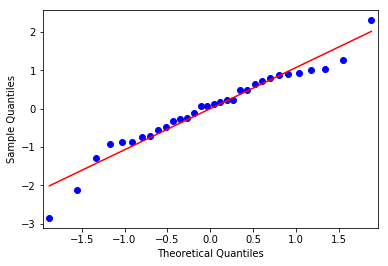

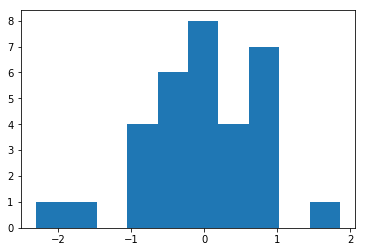

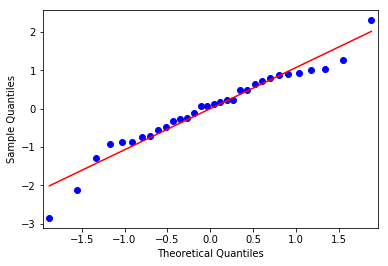

In [207]:
plt.hist(mod.resid_pearson)

sm.qqplot(mod.resid_pearson, fit=True, line='r')



## Problem 4  (10 points)

#### Problem 4a  
Using the features that you deemed important in Problem 3, construct the matrix forms of the appropriate variables.

In [197]:

Y= climateData.as_matrix(columns=['log_temp'])
X= climateData.as_matrix(columns=['CO2','IceShelf'])



(32, 2)
(32, 1)
[[ 0.0151089 ]
 [-0.32699698]]
[[ 336.67    7.2 ]
 [ 338.57    7.85]
 [ 339.92    7.25]
 [ 341.3     7.45]
 [ 342.71    7.52]
 [ 344.24    7.17]
 [ 345.81    6.93]
 [ 347.11    7.54]
 [ 348.72    7.48]
 [ 351.04    7.49]
 [ 352.68    7.04]
 [ 353.97    6.24]
 [ 355.37    6.55]
 [ 356.18    7.55]
 [ 356.69    6.5 ]
 [ 358.14    7.18]
 [ 360.02    6.13]
 [ 361.95    7.88]
 [ 363.18    6.74]
 [ 365.19    6.56]
 [ 367.86    6.24]
 [ 368.83    6.32]
 [ 370.43    6.75]
 [ 372.01    5.96]
 [ 374.45    6.15]
 [ 376.77    6.05]
 [ 378.3     5.57]
 [ 380.83    5.92]
 [ 382.56    4.3 ]
 [ 384.39    4.68]
 [ 386.34    5.36]
 [ 388.13    4.9 ]]
Estimated intercept coefficient: [-13.19785662]
Adjusted R^2 of the regression: 0.594999993422
The estimated coefficients on the regressors: [[ 0.04372854  0.10842508]]


#### Problem 4b  
Use the matrix forms to compute the solution for the regression problem using matrix computations.

In [ ]:
W_e = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T),Y)
print(W_e)


#### Problem 4c
How does the answer in Problem 4b compare to that of 3c?

## Problem 5  Probabilistic Simulation (24 points)

A man walks into a casino with \$1000.  He promises that he will leave when he either gains $15\%$ ($1150) or when he loses all his money.  Make the following 3 assumptions:
- Assume that each bet is for red or black and will win or lose based on these probabilities
- Assume that the dollar bet values are a Gaussian distribution N(\$10, stdev=\$5) rounded to \$0.01 and >= \$0.01
- At the end of each spin, <span style="color:red">you increase or decrease your holdings by the dollar bet depending on whether you win or lose, respectively</span>.

Code the simulation for this.  This means that you will write code that does the following:

loop over the following code many times:
    * Start with total = $1000
    * Repeat until done
        * place a bet on red or black
        * spin the wheel
        * determine if you won or lost
        * update your total

How many loops you ask?  Enough to estimate with reasonable accuracy without torturing the grader.

In [91]:


def roulette_game():
    iteration = 0
    total_dollars = 1000

    while (0 < total_dollars <=1150):
        
        iteration += 1
        
        #print ("total dollars before bet: {:.2f}".format(total_dollars))
        
        #bet amount with mu=10, sigma=5
        bet_ammount = round(rand.gauss(10, 5),2)
        
        #if we are required to bet more than we have, we wait for the next round of betting
        if bet_ammount > total_dollars:
            continue
        
        #print ("betting {:.2f} dollars...".format(bet_ammount))

        #winning with a probability of red (and black) are .474 from Q1
        #resolves to 1 for win, -1 otherwise
        win_switch = 1 if rand.random() <= 0.474 else -1
        
        total_dollars += (bet_ammount * win_switch)  
        #print ("total dollars after bet: {:.2f}".format(total_dollars))
        #print ("="*30)
        
    return iteration, total_dollars


## set reproducible seed
rand.seed(1234)

games = 10**4

roulette_results = [roulette_game() for i in range(games)]



#### Problem 5a
Estimate the average number of bets required to leave with \$1150 or \$0.  That is, how many bets did you place until you were done on average?

In [92]:
print ("Mean number of bets was {:.0f} over {} games".format(np.mean([i[0] for i in roulette_results]),games))


Mean number of bets was 1443 over 10000 games


#### Problem 5b
In 5a, you estimed the average.  Here, estimate the standard deviation of the number of bets placed.

In [93]:
print ("Standard deviation of bets was {:.0f} over {} games".format(np.std([i[0] for i in roulette_results]),games))


Standard deviation of bets was 994 over 10000 games


#### Problem 5c
Estimate the probability of winning (leaving with $1150)

In [94]:
print ("Probability of winning was {:.2f} over {} games".format(np.mean([i[1] >=1150 for i in roulette_results]),games))

Probability of winning was 0.27 over 10000 games


## Problem 6  Gradient Descent (20 points)

Use a gradient search approach to find the minimum value of:
$$f(x,y) = x * e^{(-(x+0.2)^2 - 0.25(y+1)^2)} + 0.35*x*e^{(-(x+0.4)^2 - 2(y-3)^2)}$$

The gradient of the function is [dx dy] are defined below. 

Let $u = -(x+0.2)^2 - 0.25(y+1)^2$

Let $v = -(x+0.4)^2 - 2(y-3)^2$

$dx: exp(u) + xexp(u)[-2(x+0.2)] + 0.25exp(v) + 0.25xexp(v)[-2(x+0.4)]$

$dy: xexp(u)[-0.5(y+1)] + 0.25xexp(v)[-4(y-3)]$

Do not spend many hours on this.  Correctly implement the gradient descent 


#### Problem 6a
Start at (-4, -4) and compute the final (x,y) and the minimum value.

In [163]:
obj = lambda x,y: x * np.e**(-1 * (x+.2)**2 - .25*(y+1)**2) + .35 * x * np.e**(-1*(x+.4)**2-2*(y-3)**2)

u = lambda x,y:-1*(x+.2)**2-.25*(y+1)**2
v = lambda x,y:-1*(x+.4)**2-2*(y-3)**2

dx = lambda x,y: np.e**(u(x,y)) + x*np.e**(u(x,y)) *(-2*(x+.2)) + .25*np.e**(v(x,y))*(-2*(x+.4))
dy = lambda x,y: x* np.e**(u(x,y))*(-.5*(y+1))+.25*x*np.e**(v(x,y))*-4*(y-3)




import numpy as np

def gradient_descent(x0, y0, alpha, eps, max_iter):
    
    iterations = 0
    has_converged = False

    # Iterate Loop
    while not has_converged:

        iterations += 1  # update iterations
        
        # update the theta_temp
        xTemp = x0 - alpha * dx(x0,y0)
        yTemp = y0 - alpha * dy(x0,y0)
        
        #print (f(xTemp,yTemp))
        
        if (abs(obj(x0,y0) - obj(xTemp,yTemp)) < eps):
            has_converged = True
            print ("Converged, iterations: ", iterations, "!\n")
        
        # update the unknowns
        x0 = xTemp
        y0 = yTemp       

        if (iterations == max_iter): 
            has_converged = True
            print ("Max iterations exceeded!\n")

    return x0,y0


def run_gd(xinit, yinit,alpha=.0001):
    # epsilon and max_iter are the convergence criteria
    eps = 0.0000000001
    max_iter = 100000000

    print (" The starting value of the cost function is: ", obj(xinit,yinit), "\n")
    print (" The starting value of the gradient for x is: ", dx(xinit,yinit), "\n")
    print (" The starting value of the gradient for y is: ", dy(xinit,yinit), "\n")

    # check if the objective is decreasing
    firstStep = obj(xinit - alpha * dx(xinit,yinit),yinit - alpha * dy(xinit,yinit))
    print (" The value of the cost function for the first step is: ", firstStep, "\n")

    xMin, yMin = gradient_descent(xinit, yinit, alpha, eps, max_iter)
    print (" The final values of x, y are: ", xMin, yMin, "\n")
    print (" The final value of the cost function is: ", obj(xMin,yMin), "\n")

run_gd(-4,-4)


 The starting value of the cost function is:  -2.2577980226939165e-07 

 The starting value of the gradient for x is:  -1.6594815466800285e-06 

 The starting value of the gradient for y is:  -3.386697034040875e-07 

 The value of the cost function for the first step is:  -2.2577980255624929e-07 

Converged, iterations:  1 !

 The final values of x, y are:  -3.999999999834052 -3.999999999966133 

 The final value of the cost function is:  -2.2577980255624929e-07 



#### Problem 6b
Start at (-2, 4) and compute the final (x,y) and the minimum value.

In [160]:
run_gd(-2,4)

 The starting value of the cost function is:  -0.007474649466968013 

 The starting value of the gradient for x is:  0.007900901714376745 

 The starting value of the gradient for y is:  0.021302138403276733 

 The value of the cost function for the first step is:  -0.007475121616921305 

Converged, iterations:  17056 !

 The final values of x, y are:  -2.2236205163967453 3.555304487319905 

 The final value of the cost function is:  -0.015307695980486622 



#### Problem 6c
Start at (4, 4) and compute the final (x,y) and the minimum value.

In [161]:
run_gd(4,4)

 The starting value of the cost function is:  9.091882024104218e-10 

 The starting value of the gradient for x is:  -2.5376346073107987e-09 

 The starting value of the gradient for y is:  -2.537479151103912e-09 

 The value of the cost function for the first step is:  9.091882023822811e-10 

Converged, iterations:  1 !

 The final values of x, y are:  4.0000000000025375 4.0000000000025375 

 The final value of the cost function is:  9.091882023822811e-10 



#### Problem 6d
What can you conclude about the sensitivity to the starting point and parameters?

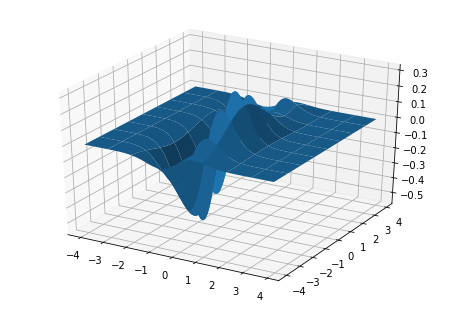

In [170]:
#It appears that there are multiple local minimums where gradient descent is getting stuck, plotting to confirm
#Changing the starting parameters of x, y therefore determines the closest local minimum and not necessarily 
#the global min


from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()

x = np.arange(-4, 4, 0.1);
y = np.arange(-4, 4, 0.1);
xs, ys = np.meshgrid(x,y)
z = obj(xs, ys)
fig = plt.figure()

ax = Axes3D(fig)
ax.plot_surface(xs,ys,z, rstride=10, cstride=10)
plt.show()

## Problem 7 (1 point)
How many hours did this homework take you?

In [ ]:
8